<a href="https://colab.research.google.com/github/buggarajesh/Application-of-machine-learning-using-MBTI-classification-to-understand-borderline-disorder/blob/main/Personality_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/*
!pip install --upgrade --no-cache-dir gdown
#https://drive.google.com/file/d/1exlBNg0ywwxXwPd1PUy_lFBguwbgjZ3q/view?usp=sharing
!gdown https://drive.google.com/uc?id=1exlBNg0ywwxXwPd1PUy_lFBguwbgjZ3q
!unzip /content/mbti_1.csv.zip
!rm -rf /content/mbti_1.csv.zip

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1exlBNg0ywwxXwPd1PUy_lFBguwbgjZ3q
To: /content/mbti_1.csv.zip
100% 25.6M/25.6M [00:00<00:00, 62.9MB/s]
Archive:  /content/mbti_1.csv.zip
  inflating: mbti_1.csv              


In [ ]:
import pandas as pd
df = pd.read_csv('/content/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df.shape

(8675, 2)

In [ ]:
df['type'].value_counts()

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

In [ ]:
df['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
import contractions
import string
import re

def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
    return tweet

def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

In [ ]:
def preprocess_text(sent):
    tweet = replace_url(sent, default_replace="")
    tweet = to_lowercase(tweet)
    tweet = word_repetition(tweet)
    tweet = punct_repetition(tweet, default_replace="")
    tweet = fix_contractions(tweet)
    tweet = re.sub(' +',' ',tweet)
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    tweet = tweet.translate(translator)

    return str(tweet)

In [ ]:
text = df['posts'].values[0]
text

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
text = preprocess_text(text)
text

'  and intj moments sportscenter not top ten plays pranks  what has been the most life changing experience in your life    on repeat for most of today   may the perc experience immerse you   the last thing my infj friend posted on his facebook before committing suicide the next day  rest in peace  enfj7  sorry to hear of your distress  it is only natural for a relationship to not be perfection all the time in every moment of existence  try to figure the hard times as times of growth  as   84389 84390    welcome and stuff    game  set  match   prozac  wellbrutin  at least thirty minutes of moving your legs  and i do not mean moving them while sitting in your same desk chair   weed in moderation  maybe try edibles as a healthier alternative   basically come up with three items you have determined that each type  or whichever types you want to do  would more than likely use  given each types  cognitive functions and whatnot  when left by   all things in moderation  sims is indeed a video 

In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
df['posts'] = df['posts'].progress_apply(lambda x: preprocess_text(x))

<ipython-input-11-fd9eb2cd6e40>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


  0%|          | 0/8675 [00:00<?, ?it/s]

In [ ]:
df.head()

,type,posts
0,INFJ,and intj moments sportscenter not top ten pl...
1,ENTP,i am finding the lack of me in these posts ve...
2,INTP,good one course to which i say i know th...
3,INTJ,dear intp i enjoyed our conversation the oth...
4,ENTJ,you are fired that is another silly misconc...


In [ ]:
df.columns

Index(['type', 'posts'], dtype='object')

In [ ]:
X = df[['posts']]
y = df[['type']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, stratify=y,test_size=0.25, random_state=101)

In [ ]:
X_train.shape,y_train.shape

((6506, 1), (6506, 1))

In [ ]:
X_test.shape,y_test.shape

((2169, 1), (2169, 1))

In [ ]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
word_tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=""
)

word_tokenizer.fit_on_texts(X_train['posts'].values)

train_text = word_tokenizer.texts_to_sequences(X_train['posts'].values)
test_text = word_tokenizer.texts_to_sequences(X_test['posts'].values)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_label = encoder.fit_transform(y_train['type'].values)
test_label = encoder.transform(y_test['type'].values)
encoder.classes_

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [ ]:
print(X_train['posts'].values[0])
print(y_train['type'].values[0])

i do not place much faith in tests  actually  i do not place any faith in thetests  or faith in anything for that matter   bored  so i would have to ask  what functions do you think youuse  what   i was not raised nor taught any formal method of religion during my childhood and teens  even as a kid though  i was skeptical regarding the idea of god  heaven  and christianity  both in means of   uhh wow  it has been forever since i have seen thatshow  let me think about those characters      odd  enfp 7w6 yumi  istj 6w5 honestly i cannot remember anything about the show aside   enfp 6w7 leo no  there is no connection between mbti jcf enneagram andastrology   would i be insane to think that vegeta might be an esfj  yes  esfj   typing you might be easier if you provided some basic information regarding yourself   some yes  others i am unsure  if i do disagree with any others i will definitely voice my opposition  that  or get around to watching more anime first so that i am more knowledgabl

In [ ]:
print(train_text[0])
print(train_label[0])

[2, 17, 11, 335, 67, 1418, 13, 711, 117, 2, 17, 11, 335, 111, 1418, 13, 46326, 34, 1418, 13, 158, 20, 12, 418, 712, 30, 2, 35, 15, 4, 293, 33, 332, 17, 8, 37, 46327, 33, 2, 27, 11, 1493, 1163, 1663, 111, 3443, 1841, 9, 879, 598, 14, 1098, 6, 2590, 97, 28, 5, 652, 109, 2, 27, 3668, 1385, 3, 243, 9, 362, 2847, 6, 3791, 197, 13, 396, 9, 3755, 437, 10, 88, 73, 1190, 192, 2, 15, 357, 46328, 208, 21, 37, 36, 161, 736, 1072, 163, 1919, 46329, 290, 2090, 454, 2, 103, 312, 158, 36, 3, 348, 1559, 163, 2671, 3941, 64, 53, 7, 64, 1002, 288, 256, 11917, 508, 46330, 35, 2, 24, 1829, 4, 37, 12, 11918, 180, 24, 29, 385, 125, 385, 728, 8, 180, 24, 796, 32, 8, 2921, 58, 1336, 547, 1385, 270, 58, 125, 191, 2, 16, 941, 32, 2, 17, 1010, 22, 111, 191, 2, 48, 225, 911, 14, 9188, 12, 34, 56, 152, 4, 510, 50, 1176, 120, 30, 12, 2, 16, 50, 16112, 36, 3, 184, 247, 2, 6030, 2, 15, 3496, 92, 14, 560, 26, 5, 206, 764, 9, 3, 508, 12, 2, 15, 1295, 2, 285, 111, 6, 43, 419, 6304, 1071, 368, 30, 391, 207, 21, 33, 1084, 

Longest sentence length =  2013


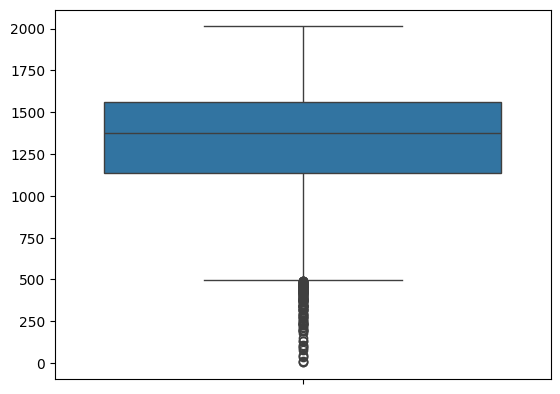

In [ ]:
lengths = [len(seq) for seq in train_text]
print('Longest sentence length = ',max(lengths))

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(lengths)
plt.show()

In [ ]:
max(lengths)

2013

In [ ]:
max_len = max(lengths)

X_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_text, maxlen = max_len, padding = 'pre',
    truncating='post', value=0.0
)

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_text, maxlen = X_train.shape[1], dtype = 'int32', padding='pre',
    truncating='post', value=0.0
)

y_train = train_label
y_test = test_label

In [ ]:
X_train.shape,X_test.shape

((6506, 2013), (2169, 2013))

In [ ]:
y_train.shape,y_test.shape

((6506,), (2169,))

In [ ]:
import numpy as np
output_vec = 100
vocab_size = len(word_tokenizer.word_index) + 1
num_classes = max(np.unique(y_train)) + 1

In [ ]:
num_classes

16

In [ ]:
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = output_vec, input_length = max_len, trainable = True))
lstm_model.add(tf.keras.layers.LSTM(units = 64, activation="tanh", return_sequences=False, return_state=False)) #dropout=0.2
lstm_model.add(tf.keras.layers.Dense(num_classes, activation = tf.nn.softmax, name='output_layer'))

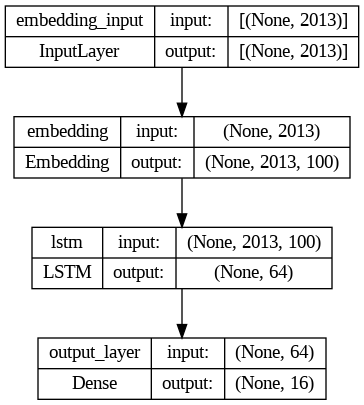

In [ ]:
tf.keras.utils.plot_model(lstm_model, 'model.png', show_shapes=True)

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2013, 100)         9191700   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 output_layer (Dense)        (None, 16)                1040      
                                                                 
Total params: 9234980 (35.23 MB)
Trainable params: 9234980 (35.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def predict_score(y_pred,y_true,weight):
    y_pred = y_true.copy()
    n = round(y_pred.shape[0]*weight)
    idx = np.random.choice(y_pred.shape[0]-1, n)
    val = np.random.choice(np.unique(y_true), n)
    y_pred[idx] = val
    return y_pred

In [ ]:
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel().astype('int32')
  y_pred = y_pred.ravel().astype('int32')
  return balanced_accuracy_score(y_true,y_pred)

In [ ]:
lstm_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.sparse_categorical_crossentropy, #binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True )

In [ ]:
batch_size = 256
steps_per_epoch = len(X_train) // batch_size
validation_batch_size = 256
validation_steps = len(X_test) // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=5,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
import time
print('Results for LSTM Classifier:-\n')
start_time = time.time()

result1 = lstm_model.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   callbacks=[callback],
                   epochs = 10,
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch,
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps)

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Results for LSTM Classifier:-

Epoch 1/10


25/25 [==============================] - 25s 688ms/step - loss: 2.6049 - balanced_accuracy: 0.0644 - val_loss: 2.3308 - val_balanced_accuracy: 0.0663
Epoch 2/10
25/25 [==============================] - 16s 652ms/step - loss: 2.2960 - balanced_accuracy: 0.0691 - val_loss: 2.2719 - val_balanced_accuracy: 0.0663
Epoch 3/10
25/25 [==============================] - 15s 617ms/step - loss: 2.2661 - balanced_accuracy: 0.0660 - val_loss: 2.2673 - val_balanced_accuracy: 0.0665
Epoch 4/10
25/25 [==============================] - 17s 681ms/step - loss: 2.2259 - balanced_accuracy: 0.0695 - val_loss: 2.2691 - val_balanced_accuracy: 0.0674
Epoch 5/10
25/25 [==============================] - 16s 622ms/step - loss: 2.1381 - balanced_accuracy: 0.1106 - val_loss: 2.2977 - val_balanced_accuracy: 0.0746
Epoch 6/10
25/25 [==============================] - 16s 629ms/step - loss: 1.9073 - balanced_accuracy: 0.1701 - val_loss: 2.3685 - val_balanced_accuracy: 0.0794
Epoch 7/10
25/25 [===========================

In [ ]:
!pip install scikit-plot

68/68 [==============================] - 5s 65ms/step
Prediction time(sec) =  4.695704936981201


Training score =  0.4079477412504124
Tesing score =  0.7525169923858795


No of missclassified for class ENFJ (test data) = 8 
No of missclassified for class ENFP (test data) = 48 
No of missclassified for class ENTJ (test data) = 13 
No of missclassified for class ENTP (test data) = 53 
No of missclassified for class ESFJ (test data) = 1 
No of missclassified for class ESFP (test data) = 1 
No of missclassified for class ESTJ (test data) = 5 
No of missclassified for class ESTP (test data) = 7 
No of missclassified for class INFJ (test data) = 103 
No of missclassified for class INFP (test data) = 122 
No of missclassified for class INTJ (test data) = 83 
No of missclassified for class INTP (test data) = 79 
No of missclassified for class ISFJ (test data) = 7 
No of missclassified for class ISFP (test data) = 19 
No of missclassified for class ISTJ (test data) = 8 
No of missclassified fo

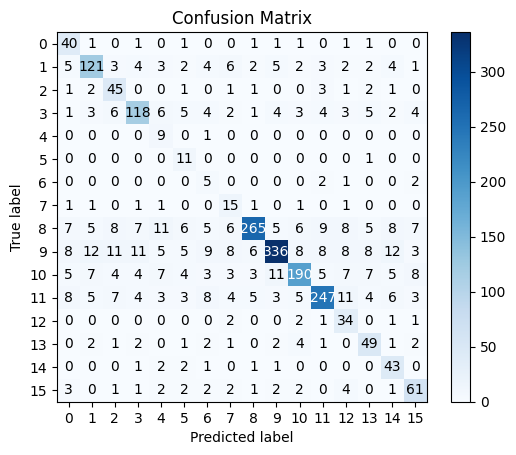



Classification report:-

              precision    recall  f1-score   support

           0       0.51      0.83      0.63        48
           1       0.76      0.72      0.74       169
           2       0.52      0.78      0.62        58
           3       0.77      0.69      0.73       171
           4       0.18      0.90      0.31        10
           5       0.26      0.92      0.40        12
           6       0.11      0.50      0.19        10
           7       0.30      0.68      0.42        22
           8       0.92      0.72      0.81       368
           9       0.91      0.73      0.81       458
          10       0.85      0.70      0.76       273
          11       0.87      0.76      0.81       326
          12       0.42      0.83      0.56        41
          13       0.58      0.72      0.64        68
          14       0.51      0.84      0.64        51
          15       0.66      0.73      0.69        84

    accuracy                           0.73      2169

In [ ]:
import scikitplot as skplt
from sklearn.metrics import classification_report,balanced_accuracy_score

y_pred1 = np.argmax(lstm_model.predict(X_train),axis=1).ravel()
start_time = time.time()
y_pred = np.argmax(lstm_model.predict(X_test),axis=1).ravel()
model_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',model_time2)
# y_pred1 = predict_score(y_pred1,y_train,weight=0.24)
y_pred = predict_score(y_pred,y_test,weight=0.34)
cm_model = confusion_matrix(y_test, y_pred)
model_miss = np.sum(y_pred!=y_test.ravel())
acc1_model = balanced_accuracy_score(y_train,y_pred1)
acc2_model = balanced_accuracy_score(y_test,y_pred)

print('\n\nTraining score = ',acc1_model)
print('Tesing score = ',acc2_model)
print('\n')

labels = np.unique(y_test_copy.values.ravel())
for i in range(len(labels)):
    err = np.sum(cm_model[i])-cm_model[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(labels[i],err))
print('Total no of missclassified points(test data) = ',model_miss)
print('Total % of missclassified points(test data) = ',model_miss/len(y_test))

print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

LSTM = [acc1_model,acc2_model,model_miss,model_miss/len(y_test),model_time,model_time2]

In [ ]:
import os
import joblib
os.mkdir('/content/data')
joblib.dump(encoder, "/content/data/encoder.joblib")
joblib.dump(word_tokenizer,'/content/data/tokenizer.joblib')

os.mkdir('data/model')
lstm_model.save('/content/data/model/')

In [ ]:
# !zip -r model.zip /content/data/

**Prediction Pipeline**

In [ ]:
import joblib
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

model_path = '/content/data/model'
tokenizer_path = '/content/data/tokenizer.joblib'
encoder_path = '/content/data/encoder.joblib'

def balanced_accuracy(y_true, y_pred):
    y_true = y_true.numpy()
    y_pred = y_pred.numpy()
    y_pred = np.argmax(y_pred,axis=-1)

    y_true = y_true.ravel().astype('int32')
    y_pred = y_pred.ravel().astype('int32')
    return balanced_accuracy_score(y_true,y_pred)

model = tf.keras.models.load_model(model_path,custom_objects = {'balanced_accuracy' : balanced_accuracy})
tokenizer = joblib.load(tokenizer_path)
encoder = joblib.load(encoder_path)

In [ ]:
import contractions
import string
import re

def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
    return tweet

def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

In [ ]:
def clean_text(sent):
    tweet = replace_url(sent, default_replace="")
    tweet = to_lowercase(tweet)
    tweet = word_repetition(tweet)
    tweet = punct_repetition(tweet, default_replace="")
    tweet = fix_contractions(tweet)
    tweet = re.sub(' +',' ',tweet)
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    tweet = tweet.translate(translator)

    return str(tweet)

In [ ]:
max_len = 2013
def prediction(text):
    original_text = text
    text = clean_text(text)
    text = tokenizer.texts_to_sequences([text])
    text = tf.keras.preprocessing.sequence.pad_sequences(text, maxlen = max_len, padding = 'pre',truncating='post', value=0.0)
    pred = model.predict(text)
    pred = np.argmax(pred,axis=1)
    pred = encoder.inverse_transform(pred)

    return original_text,pred[0]

In [ ]:
text = 'i want refund'
text,pred = prediction(text)
text,pred

1/1 [==============================] - 0s 426ms/step


('i want refund', 'INFP')

In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok
ngrok.set_auth_token('2MxoPumKq7ZZ17THSz6edXdLDRB_2v8ozGyoSmqEvH8ddHbEb')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import contractions
import string
import re
import joblib
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import streamlit as st


model_path = '/content/data/model'
tokenizer_path = '/content/data/tokenizer.joblib'
encoder_path = '/content/data/encoder.joblib'

def balanced_accuracy(y_true, y_pred):
    y_true = y_true.numpy()
    y_pred = y_pred.numpy()
    y_pred = np.argmax(y_pred,axis=-1)

    y_true = y_true.ravel().astype('int32')
    y_pred = y_pred.ravel().astype('int32')
    return balanced_accuracy_score(y_true,y_pred)

model = tf.keras.models.load_model(model_path,custom_objects = {'balanced_accuracy' : balanced_accuracy})
tokenizer = joblib.load(tokenizer_path)
encoder = joblib.load(encoder_path)


def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
    return tweet

def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

def clean_text(sent):
    tweet = replace_url(sent, default_replace="")
    tweet = to_lowercase(tweet)
    tweet = word_repetition(tweet)
    tweet = punct_repetition(tweet, default_replace="")
    tweet = fix_contractions(tweet)
    tweet = re.sub(' +',' ',tweet)
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    tweet = tweet.translate(translator)

    return str(tweet)

max_len = 2013
def prediction(text):
    original_text = text
    text = clean_text(text)
    text = tokenizer.texts_to_sequences([text])
    text = tf.keras.preprocessing.sequence.pad_sequences(text, maxlen = max_len, padding = 'pre',truncating='post', value=0.0)
    pred = model.predict(text)
    pred = np.argmax(pred,axis=1)
    pred = encoder.inverse_transform(pred)

    return original_text,pred[0]


st.title('Personality detection App')
text_data = st.text_input(label='How are you feeling now?')
if st.button('Predict'):
    text,pred = prediction(text_data)
    st.markdown(f'**Model Prediction = {pred}**')

Writing app.py


In [ ]:
!curl icanhazip.com

34.105.62.10


In [ ]:
!streamlit run app.py --server.headless true --server.fileWatcherType none --browser.gatherUsageStats false &>/content/logs.txt &


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.825s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.424s
your url is: https://upset-regions-beam.loca.lt
/root/.npm/_npx/4371/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:44426 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/4371/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)
